In [1]:
import torch
from src.depth_est_dpt import dpt_depth
from src.sem_seg_dpt import dpt_semantic, dpt_get_labels
from src.utils.image_utils import semantic_overlay, load_image, save_image, save_plot

/home/wolf/.cache/pypoetry/virtualenvs/eagle-eyez-cEgAfvHZ-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Laptop GPU'

In [3]:
image = load_image("data/0024mod/0024clarity.jpg")


In [26]:
depth_image = dpt_depth(image)

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

Image.fromarray(depth_image).show()
# plt.imshow(depth_image)

In [ ]:
seg_image = dpt_semantic(image)

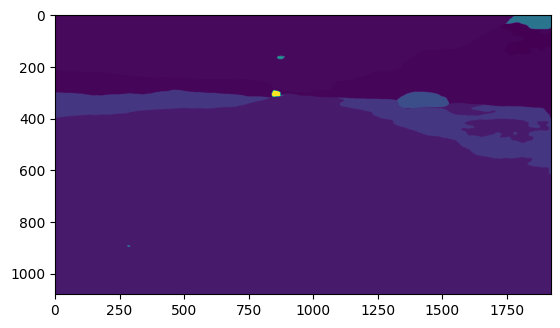

In [7]:
plt.imshow(seg_image)

[[  0   0   0 ...  23  23  23]
 [  0   0   0 ...  23  23  23]
 [  0   0   0 ...  23  23  23]
 ...
 [253 253 253 ... 238 238 238]
 [253 253 253 ... 238 238 238]
 [253 253 253 ... 238 238 238]]


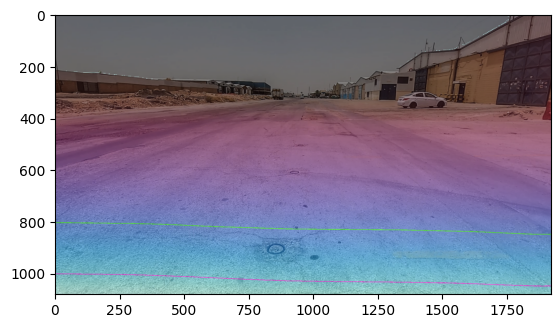

In [46]:
import numpy as np
import cv2
# Color all pixels which are one meter away in red, and all pixels which are two meters away in green.
depth_int = depth_image * 255 / np.max(depth_image)
depth_int = depth_int.astype(np.uint8)
print(depth_int.min(), depth_int.max())
# interpolate to use the full color range
depth_int_color = cv2.applyColorMap(depth_int, cv2.COLORMAP_INFERNO)
# Calibration values
PX1 = 230
PX2 = 169
# Set color for each distance
depth_int_color[depth_int == PX1] = [255, 0, 255]
depth_int_color[depth_int == PX2] = [0, 255, 0]

# plt.imshow(depth_int_color)
overlay = cv2.addWeighted(image, 0.5, depth_int_color, 0.5, 0)
plt.imshow(overlay)